In [ ]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import collections

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


Vamos primero a leer la red de PPI original

In [ ]:
human_ppi_original = nx.read_graphml("/content/HI_union.graphml")
print(nx.info(human_ppi_original))
print(human_ppi_original.nodes(data=True))

Name: HI_union
Type: DiGraph
Number of nodes: 9094
Number of edges: 64006
Average in degree:   7.0383
Average out degree:   7.0383
[('8346', {'name': 'ensembl:ENSG00000000005', 'symobl': 'TNMD'}), ('8345', {'name': 'ensembl:ENSG00000061656', 'symobl': 'SPAG4'}), ('8344', {'name': 'ensembl:ENSG00000099968', 'symobl': 'BCL2L13'}), ('8343', {'name': 'ensembl:ENSG00000104765', 'symobl': 'BNIP3L'}), ('8342', {'name': 'ensembl:ENSG00000105383', 'symobl': 'CD33'}), ('8341', {'name': 'ensembl:ENSG00000114455', 'symobl': 'HHLA2'}), ('8340', {'name': 'ensembl:ENSG00000124103', 'symobl': 'FAM209A'}), ('8339', {'name': 'ensembl:ENSG00000139637', 'symobl': 'C12orf10'}), ('8338', {'name': 'ensembl:ENSG00000150337', 'symobl': 'FCGR1A'}), ('8337', {'name': 'ensembl:ENSG00000157613', 'symobl': 'CREB3L1'}), ('8336', {'name': 'ensembl:ENSG00000163472', 'symobl': 'TMEM79'}), ('8335', {'name': 'ensembl:ENSG00000167741', 'symobl': 'GGT6'}), ('8334', {'name': 'ensembl:ENSG00000169379', 'symobl': 'ARL13B'}), 

In [ ]:
G_humanPPI=nx.Graph(human_ppi_original)

In [ ]:
labels=dict(G_humanPPI.nodes(data="symobl"))
print(labels)
PPI=nx.relabel_nodes(G_humanPPI,labels,copy=True)
print(PPI.nodes())

{'8346': 'TNMD', '8345': 'SPAG4', '8344': 'BCL2L13', '8343': 'BNIP3L', '8342': 'CD33', '8341': 'HHLA2', '8340': 'FAM209A', '8339': 'C12orf10', '8338': 'FCGR1A', '8337': 'CREB3L1', '8336': 'TMEM79', '8335': 'GGT6', '8334': 'ARL13B', '8333': 'BNIP3', '8332': 'AMIGO1', '8331': 'TMEM106A', '8330': 'KIR3DL3', '8329': 'DPM1', '8328': 'MEOX2', '5263': 'TDO2', '8327': 'SCYL3', '8326': 'GABARAPL2', '8325': 'TXN2', '8324': 'GABARAPL1', '5686': 'LHX8', '8323': 'TCAF1', '8322': 'C1orf112', '8321': 'P4HA3', '8320': 'FUCA2', '8319': 'WNT11', '8318': 'TNPO2', '8317': 'HOXA1', '8316': 'NUFIP2', '8315': 'PIN1', '8314': 'GUCD1', '8313': 'LCE1E', '8312': 'LCE1A', '8311': 'LCE4A', '8310': 'VWC2', '8309': 'KRTAP5-3', '8308': 'LCE1B', '8307': 'KRTAP5-2', '8306': 'KRTAP4-12', '8305': 'KRTAP10-1', '8304': 'NFYA', '7148': 'APPBP2', '8303': 'NFYC', '8302': 'CSNK2A1', '8301': 'NFYB', '8300': 'ATXN1', '8299': 'ZC3H10', '8298': 'VEZF1', '8297': 'POU2F1', '8296': 'POGZ', '8295': 'LUC7L2', '8294': 'DVL3', '8293': 'G

Como vamos a leer tanto la red de PPI como la de proteinas-fármacos, vamos a usar colores para distinguir las proteinas de los fármacos

In [ ]:
labels = 'skyblue'
nx.set_node_attributes(PPI, labels, "node_color")
print(PPI.nodes(data=True))

[('TNMD', {'name': 'ensembl:ENSG00000000005', 'symobl': 'TNMD', 'node_color': 'skyblue'}), ('SPAG4', {'name': 'ensembl:ENSG00000061656', 'symobl': 'SPAG4', 'node_color': 'skyblue'}), ('BCL2L13', {'name': 'ensembl:ENSG00000099968', 'symobl': 'BCL2L13', 'node_color': 'skyblue'}), ('BNIP3L', {'name': 'ensembl:ENSG00000104765', 'symobl': 'BNIP3L', 'node_color': 'skyblue'}), ('CD33', {'name': 'ensembl:ENSG00000105383', 'symobl': 'CD33', 'node_color': 'skyblue'}), ('HHLA2', {'name': 'ensembl:ENSG00000114455', 'symobl': 'HHLA2', 'node_color': 'skyblue'}), ('FAM209A', {'name': 'ensembl:ENSG00000124103', 'symobl': 'FAM209A', 'node_color': 'skyblue'}), ('C12orf10', {'name': 'ensembl:ENSG00000139637', 'symobl': 'C12orf10', 'node_color': 'skyblue'}), ('FCGR1A', {'name': 'ensembl:ENSG00000150337', 'symobl': 'FCGR1A', 'node_color': 'skyblue'}), ('CREB3L1', {'name': 'ensembl:ENSG00000157613', 'symobl': 'CREB3L1', 'node_color': 'skyblue'}), ('TMEM79', {'name': 'ensembl:ENSG00000163472', 'symobl': 'TME

Vamos ahora a leer la red de proteinas-fármacos

In [ ]:
drugbank_original = nx.read_graphml("/content/DrugBank - Target drugs.graphml")
print(nx.info(drugbank_original))


Name: DrugBank - Target drugs
Type: MultiDiGraph
Number of nodes: 11407
Number of edges: 19650
Average in degree:   1.7226
Average out degree:   1.7226


In [ ]:
print(drugbank_original.nodes(data=True))

[('0', {'name': 'UNDECYLAMINE-N,N-DIMETHYL-N-OXIDE', 'represents': 'drugbank:DB07646', 'type': 'chemical', 'class': 'small molecule'}), ('1', {'name': 'A1', 'represents': 'uniprot:P97253', 'UniProt Name': 'Light-harvesting protein B-800/850 alpha chain', 'type': 'protein'}), ('2', {'name': "Diguanosine-5'-Triphosphate", 'represents': 'drugbank:DB03931', 'type': 'chemical', 'class': 'small molecule'}), ('3', {'name': 'A103R', 'represents': 'uniprot:Q84424', 'UniProt Name': 'mRNA-capping enzyme', 'type': 'protein'}), ('4', {'name': "Guanosine-5'-Triphosphate", 'represents': 'drugbank:DB04137', 'type': 'chemical', 'class': 'small molecule'}), ('5', {'name': 'Zinc', 'represents': 'drugbank:DB01593', 'type': 'chemical', 'class': 'small molecule'}), ('6', {'name': 'A1BG', 'represents': 'uniprot:P04217', 'UniProt Name': 'Alpha-1B-glycoprotein', 'type': 'protein'}), ('7', {'name': 'Copper', 'represents': 'drugbank:DB09130', 'type': 'chemical', 'class': 'small molecule'}), ('8', {'name': 'Zinc 

In [ ]:
G_Drugs=nx.Graph(drugbank_original)
print(nx.info(G_Drugs))

Name: DrugBank - Target drugs
Type: Graph
Number of nodes: 11407
Number of edges: 19212
Average degree:   3.3685


In [ ]:
G_Drugs.nodes(data = 'name')
labels = dict(G_Drugs.nodes(data = 'name'))
D = nx.relabel_nodes(G_Drugs, labels, copy=True)

print(D.nodes(data=True))

[('UNDECYLAMINE-N,N-DIMETHYL-N-OXIDE', {'name': 'UNDECYLAMINE-N,N-DIMETHYL-N-OXIDE', 'represents': 'drugbank:DB07646', 'type': 'chemical', 'class': 'small molecule'}), ('A1', {'name': 'A1', 'represents': 'uniprot:P97253', 'UniProt Name': 'Light-harvesting protein B-800/850 alpha chain', 'type': 'protein'}), ("Diguanosine-5'-Triphosphate", {'name': "Diguanosine-5'-Triphosphate", 'represents': 'drugbank:DB03931', 'type': 'chemical', 'class': 'small molecule'}), ('A103R', {'name': 'A103R', 'represents': 'uniprot:Q84424', 'UniProt Name': 'mRNA-capping enzyme', 'type': 'protein'}), ("Guanosine-5'-Triphosphate", {'name': "Guanosine-5'-Triphosphate", 'represents': 'drugbank:DB04137', 'type': 'chemical', 'class': 'small molecule'}), ('Zinc', {'name': 'Zinc', 'represents': 'drugbank:DB01593', 'type': 'chemical', 'class': 'small molecule'}), ('A1BG', {'name': 'A1BG', 'represents': 'uniprot:P04217', 'UniProt Name': 'Alpha-1B-glycoprotein', 'type': 'protein'}), ('Copper', {'name': 'Copper', 'repre

Ahora vamos a darle el color adecuado a las proteinas y fármacos en la red de proteinas-fármacos

In [ ]:
dict_color={}
for node in D.nodes():
  if (D.nodes(data="type")[node]=="protein"):
    dict_color[node]="skyblue"
  else:
    dict_color[node]="orange"
nx.set_node_attributes(D, dict_color, 'node_color')
print(D.nodes(data="node_color"))

[('UNDECYLAMINE-N,N-DIMETHYL-N-OXIDE', 'orange'), ('A1', 'skyblue'), ("Diguanosine-5'-Triphosphate", 'orange'), ('A103R', 'skyblue'), ("Guanosine-5'-Triphosphate", 'orange'), ('Zinc', 'orange'), ('A1BG', 'skyblue'), ('Copper', 'orange'), ('Zinc acetate', 'orange'), ('Zinc chloride', 'orange'), ('Becaplermin', 'orange'), ('A2M', 'skyblue'), ('Cisplatin', 'orange'), ('Bacitracin', 'orange'), ('Ocriplasmin', 'orange'), ('Silver', 'orange'), ('N-Acetylmethionine', 'orange'), ('Aaar', 'skyblue'), ('O-Succinylbenzoate', 'orange'), ('N-Succinyl Phenylglycine', 'orange'), ('N-Succinyl Methionine', 'orange'), ("3'-Phosphate-Adenosine-5'-Diphosphate", 'orange'), ('aac', 'skyblue'), ('Coenzyme A', 'orange'), ('Ribostamycin', 'orange'), ("aac(6')-Ii", 'skyblue'), ('aacC1', 'skyblue'), ('Spermidine', 'orange'), ('Gibberellic acid', 'orange'), ('AADACL2', 'skyblue'), ('GIBBERELLIN A4', 'orange'), ('Pyridoxal phosphate', 'orange'), ('AADAT', 'skyblue'), ('Glutamic Acid', 'orange'), ('Fostamatinib', '

Vamos ahora a combinar las redes protein-proteina y fármaco-proteina

In [ ]:
listNetworks = [PPI, D]
G_merge = nx.compose_all(listNetworks)
print(nx.info(G_merge))

Name: DrugBank - Target drugs
Type: Graph
Number of nodes: 19300
Number of edges: 83197
Average degree:   8.6215


In [ ]:
diabetes = pd.read_csv(r'/content/efotraits_EFO_0001360-associations-2021-08-9.csv')
diabetes = diabetes.head(100)
genes = list(diabetes['Mapped gene'])
print(len(genes))
diabetes.head()

100


Variant and risk allele    P-value  ... Study accession      Location
0      rs9465871-<b>?</b>   6 x 10-8  ...      GCST004304    6:20717024
1     rs10761745-<b>?</b>   5 x 10-6  ...      GCST004305   10:63341311
2       rs163177-<b>C</b>   1 x 10-6  ...      GCST004305    11:2817183
3     rs11131794-<b>?</b>   5 x 10-6  ...      GCST008827   4:167738950
4      rs7903146-<b>T</b>  3 x 10-11  ...      GCST007221  10:112998590

[5 rows x 12 columns]

Queremos saber que nodos de los de arriba están en la red combinada

In [ ]:
overlap = list(set(genes)&set(G_merge.nodes()))
print(type(overlap))
print(len(overlap))

<class 'list'>
25


In [ ]:
diabetes_neighbors=list(set([neigh for node in overlap for neigh in G_merge.neighbors(node)]))
diabetes_neighbors_nodes=diabetes_neighbors+diabetes_neighbors+overlap

P = G_merge.subgraph(diabetes_neighbors_nodes)
print(P.nodes(data=True))
print(len(P.nodes()))

[('VPS52', {'name': 'ensembl:ENSG00000223501', 'symobl': 'VPS52', 'node_color': 'skyblue'}), ('Metharbital', {'name': 'Metharbital', 'represents': 'drugbank:DB00463', 'type': 'chemical', 'class': 'small molecule', 'node_color': 'orange'}), ('REL', {'name': 'ensembl:ENSG00000162924', 'symobl': 'REL', 'node_color': 'skyblue'}), ('C16orf58', {'name': 'ensembl:ENSG00000140688', 'symobl': 'C16orf58', 'node_color': 'skyblue'}), ('Nitrazepam', {'name': 'Nitrazepam', 'represents': 'drugbank:DB01595', 'type': 'chemical', 'class': 'small molecule', 'node_color': 'orange'}), ('THOC7', {'name': 'ensembl:ENSG00000163634', 'symobl': 'THOC7', 'node_color': 'skyblue'}), ('SFT2D1', {'name': 'ensembl:ENSG00000198818', 'symobl': 'SFT2D1', 'node_color': 'skyblue'}), ('TRIM27', {'name': 'ensembl:ENSG00000204713', 'symobl': 'TRIM27', 'node_color': 'skyblue'}), ('MLX', {'name': 'ensembl:ENSG00000108788', 'symobl': 'MLX', 'node_color': 'skyblue'}), ('Bepridil', {'name': 'Bepridil', 'represents': 'drugbank:DB0

In [ ]:
node_colors=dict(P.nodes(data="node_color")).values()
print(node_colors)

dict_values(['skyblue', 'orange', 'skyblue', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'orange', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue', 'orange', 'orange', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue', 'orange', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 

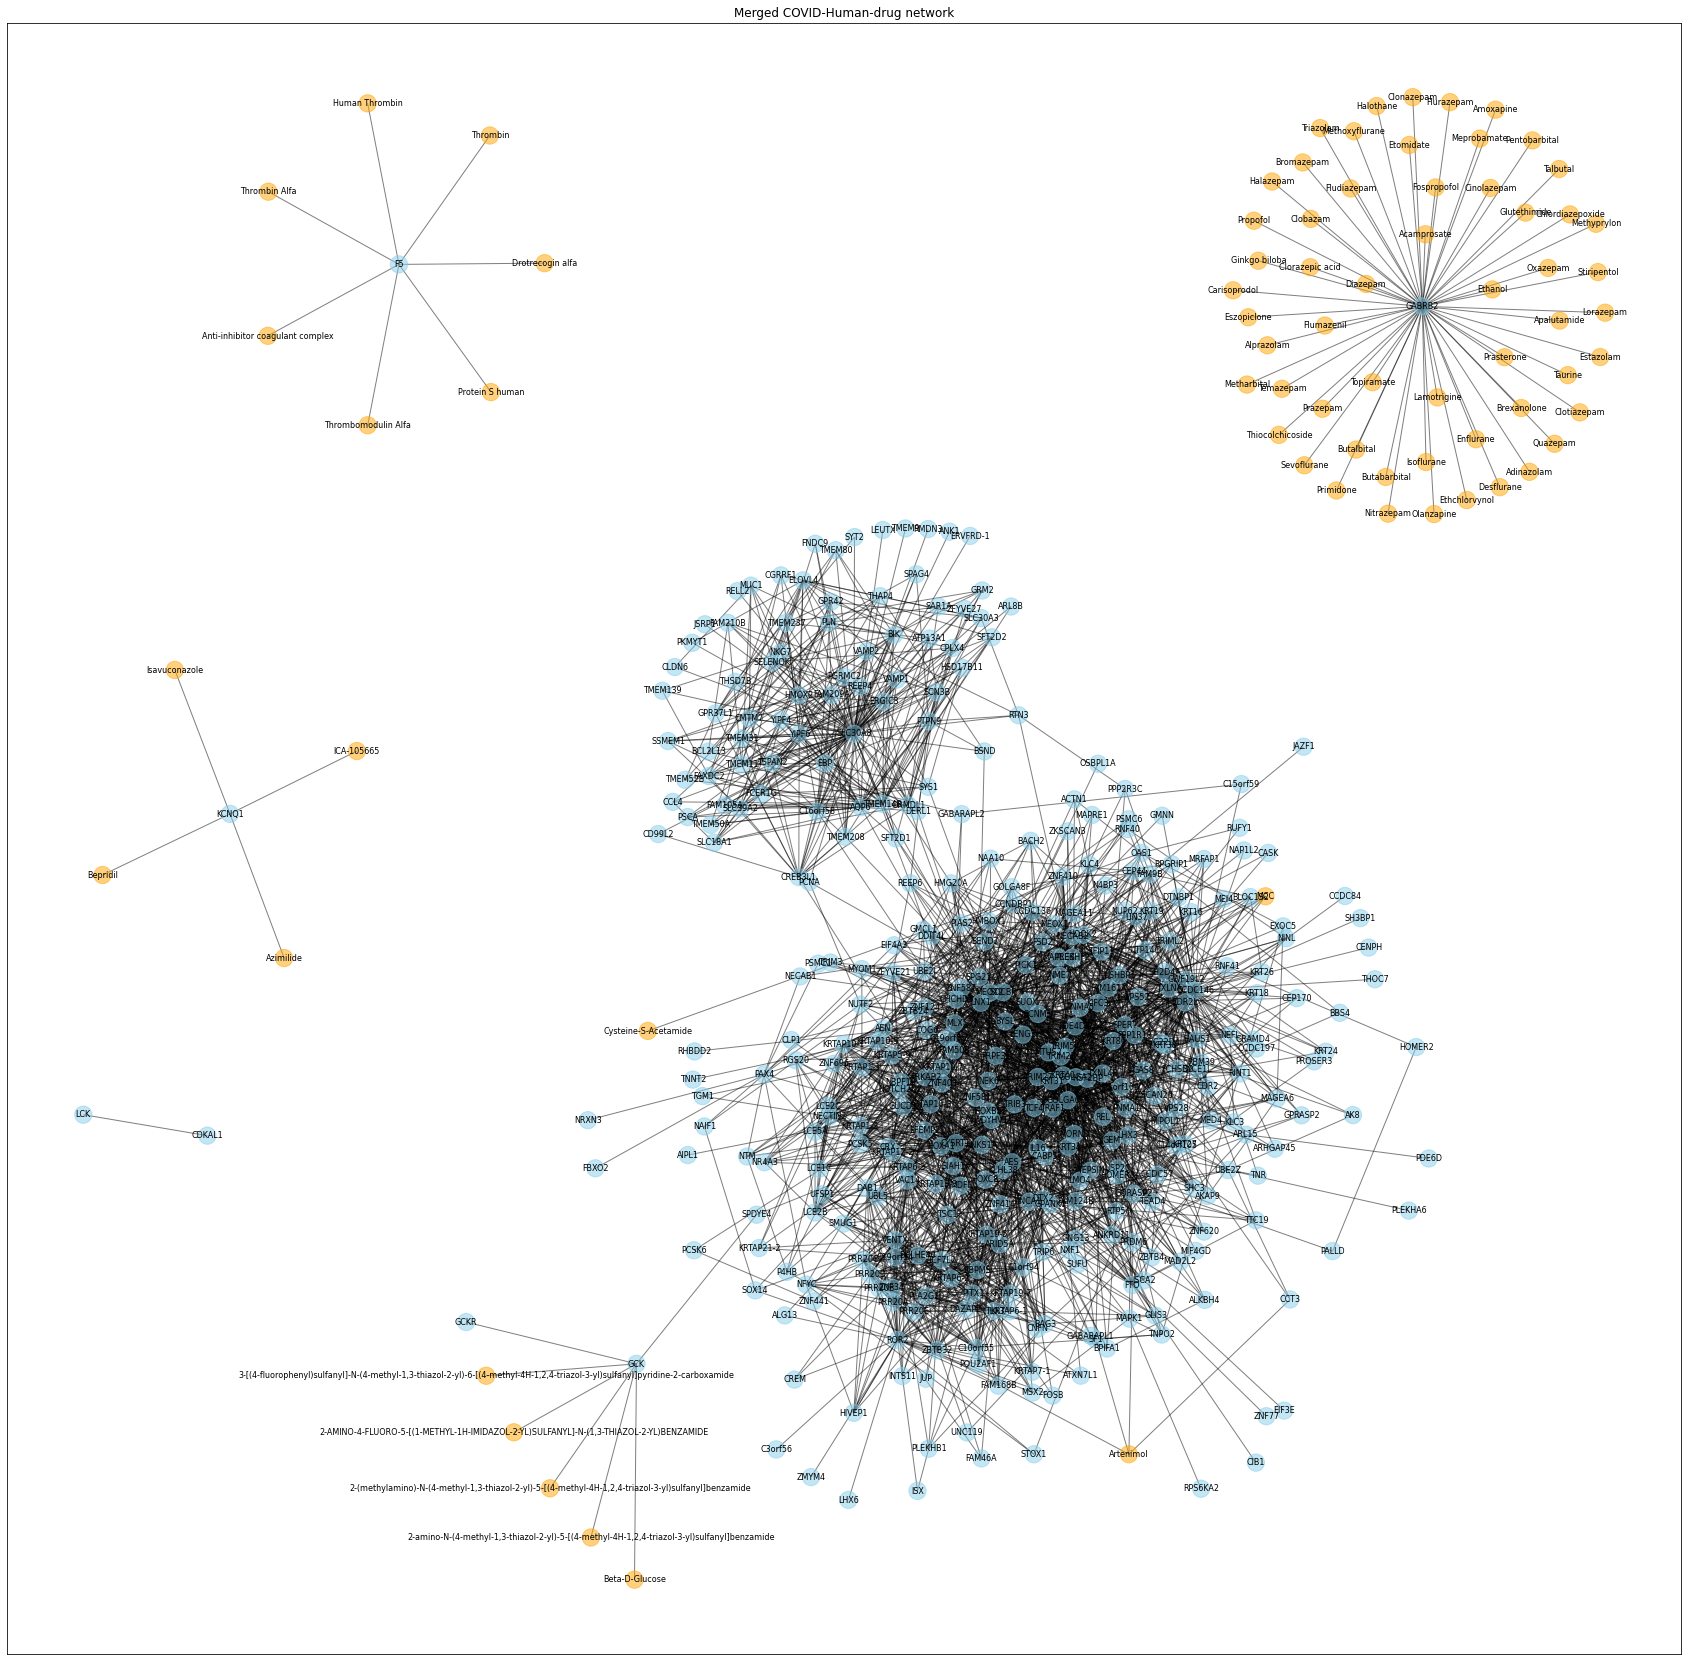

In [ ]:
pos = nx.nx_agraph.graphviz_layout(P,prog='neato')
node_colors=dict(P.nodes(data="node_color")).values()
# # Plot the graph
plt.figure(figsize=(30, 30))
nx.draw_networkx_nodes(P, pos=pos,node_size=300,alpha=0.5,node_color=node_colors)
nx.draw_networkx_edges(P, pos=pos,width=1,arrows=False,alpha=0.5)
# #Uncomment to label by node number
nx.draw_networkx_labels(P,pos=pos, font_size=8, alpha=1)
plt.title("Merged PPI-Drug network")
plt.show()